In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from glob import glob
from StringIO import StringIO

''' created quick class based on August 1st Analysis '''
from MTAReader import MTAReader

In [2]:
combined_files = ''

for i_file, file_name in enumerate(glob('data/turnstile_*')):
#     if i_file == 1:
#         print('Skipping', file_name)
#         continue

#     if i_file > 0:
#         combined_files += '\n'
        
    print('Reading', file_name)
    combined_files += open(file_name).read()
    #     combined_files = open(file_name).read()

print('Len of all files together', len(combined_files))

combined_files_buffer = StringIO(combined_files)
combined_files_buffer

('Reading', 'data/turnstile_130706.txt')
('Reading', 'data/turnstile_130713.txt')
('Reading', 'data/turnstile_130720.txt')
('Reading', 'data/turnstile_130727.txt')
('Reading', 'data/turnstile_130803.txt')
('Len of all files together', 70355724)


<StringIO.StringIO instance at 0x110f64950>

In [3]:
mta = MTAReader('Misc', data_str=combined_files_buffer)

('Starting', 'Misc')
Generated columns
Read in raw data
Merged with stations
Types corrected
Reduced
Computted Traffic
('Fixing # rows:', 229)
Replaced bad odemeter values
('Dumped to', '2013-06-29 - 2013-08-02.csv')



In [5]:
tests = mta.df.head()

In [11]:
tests['minutes'] = tests.datetime.apply(lambda x: x.hour*60 + x.minute)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
tests

,control_area,created_by_human,csv_row,date,description,division,interval,line_name,odometer_entries,odometer_exits,...,scp,station,file,datetime,entries,exits,net_time,net_flow,cummulative_flow,minutes
168654,H007,False,22824,2013-06-29,REGULAR,BMT,0,L,7104519,7720484,...,00-00-00,1 AVE,Misc,2013-06-29 00:00:00,NaN,NaN,NaT,NaN,NaN,0
168655,H007,False,22824,2013-06-29,REGULAR,BMT,1,L,7104707,7720826,...,00-00-00,1 AVE,Misc,2013-06-29 04:00:00,188,342,04:00:00,-154,530,240
168656,H007,False,22824,2013-06-29,RECOVR AUD,BMT,2,L,7104707,7720826,...,00-00-00,1 AVE,Misc,2013-06-29 04:00:00,0,0,00:00:00,0,0,240
168657,H007,False,22824,2013-06-29,REGULAR,BMT,3,L,7104811,7721144,...,00-00-00,1 AVE,Misc,2013-06-29 08:00:00,104,318,04:00:00,-214,422,480
168658,H007,False,22824,2013-06-29,REGULAR,BMT,4,L,7105375,7721808,...,00-00-00,1 AVE,Misc,2013-06-29 12:00:00,564,664,04:00:00,-100,1228,720


In [15]:
tests.dtypes

control_area                 object
created_by_human               bool
csv_row                       int64
date                 datetime64[ns]
description                  object
division                     object
interval                      int64
line_name                    object
odometer_entries              int64
odometer_exits                int64
remote_unit                  object
scp                          object
station                      object
file                         object
datetime             datetime64[ns]
entries                     float64
exits                       float64
net_time            timedelta64[ns]
net_flow                    float64
cummulative_flow            float64
minutes                       int64
dtype: object

In [57]:
from sqlalchemy import create_engine
from sqlalchemy.sql import select
engine = create_engine('sqlite:///django/mta/db.sqlite3', echo=False)

connection = engine.connect()

result = connection.execute('select * from django_migrations')
for row in result:
    print(row)

(1, u'contenttypes', u'0001_initial', u'2016-02-26 03:57:48.328488')
(2, u'auth', u'0001_initial', u'2016-02-26 03:57:48.350961')
(3, u'admin', u'0001_initial', u'2016-02-26 03:57:48.368498')
(4, u'admin', u'0002_logentry_remove_auto_add', u'2016-02-26 03:57:48.384936')
(5, u'analysis', u'0001_initial', u'2016-02-26 03:57:48.391449')
(6, u'analysis', u'0002_auto_20160226_0322', u'2016-02-26 03:57:48.409303')
(7, u'analysis', u'0003_auto_20160226_0342', u'2016-02-26 03:57:48.448158')
(8, u'analysis', u'0004_auto_20160226_0356', u'2016-02-26 03:57:48.582827')
(9, u'analysis', u'0005_auto_20160226_0356', u'2016-02-26 03:57:48.599489')
(10, u'contenttypes', u'0002_remove_content_type_name', u'2016-02-26 03:57:48.642863')
(11, u'auth', u'0002_alter_permission_name_max_length', u'2016-02-26 03:57:48.658125')
(12, u'auth', u'0003_alter_user_email_max_length', u'2016-02-26 03:57:48.673287')
(13, u'auth', u'0004_alter_user_username_opts', u'2016-02-26 03:57:48.692570')
(14, u'auth', u'0005_alte

In [53]:
tests['file_name'] = tests.file
del tests['file']

AttributeError: 'DataFrame' object has no attribute 'file'

In [55]:
from sqlalchemy import create_engine


tests.to_sql(
    name='analysis_stats',
    con=engine.raw_connection(),
    if_exists='append',
    index=False
)

In [56]:
mta.df['file_name'] = mta.df.file
del mta.df['file']

In [58]:
mta.df.to_sql(
    name='analysis_stats',
    con=engine.raw_connection(),
    if_exists='append',
    index=False
)

# Fix data

In [61]:
%load_ext sql

/usr/local/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/usr/local/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [65]:
%sql sqlite:///django/mta/db.sqlite3

u'Connected: None@django/mta/db.sqlite3'

In [66]:
%%sql
select *
FROM analysis_stats
LIMIT 5

Done.


id,datetime,control_area,created_by_human,csv_row,file_name,date,description,division,interval,line_name,odometer_entries,odometer_exits,remote_unit,scp,station,minutes,cummulative_flow,entries,net_flow,net_time,exits
1,2013-06-29 00:00:00,H007,0,22824,Misc,2013-06-29 00:00:00,REGULAR,BMT,0,L,7104519,7720484,R248,00-00-00,1 AVE,None,None,None,None,None,None
2,2013-06-29 04:00:00,H007,0,22824,Misc,2013-06-29 00:00:00,REGULAR,BMT,1,L,7104707,7720826,R248,00-00-00,1 AVE,None,530,188,-154,14400000000000,342
3,2013-06-29 04:00:00,H007,0,22824,Misc,2013-06-29 00:00:00,RECOVR AUD,BMT,2,L,7104707,7720826,R248,00-00-00,1 AVE,None,0,0,0,0,0
4,2013-06-29 08:00:00,H007,0,22824,Misc,2013-06-29 00:00:00,REGULAR,BMT,3,L,7104811,7721144,R248,00-00-00,1 AVE,None,422,104,-214,14400000000000,318
5,2013-06-29 12:00:00,H007,0,22824,Misc,2013-06-29 00:00:00,REGULAR,BMT,4,L,7105375,7721808,R248,00-00-00,1 AVE,None,1228,564,-100,14400000000000,664


In [81]:
top_wrong_entries = %%sql select id, entries, exits, station, scp, datetime FROM analysis_stats ORDER BY entries DESC LIMIT 400

Done.


In [82]:
top_wrong_entries = top_wrong_entries.DataFrame()

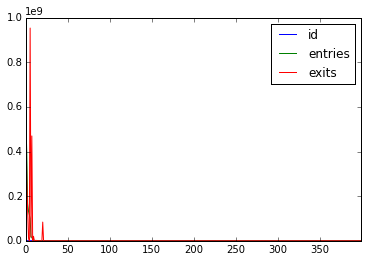

In [83]:
%matplotlib inline

# top_wrong_entries.hist(column='entries', by='station', figsize=(20,30))
top_wrong_entries.plot()

In [116]:
top_wrong_entries[0:22]

,id,entries,exits,station,scp,datetime
0,619249,532987576,534126084,DYRE AVE,00-00-03,2013-07-04 18:46:09
1,363692,387048786,270114719,7 AVE,00-00-03,2013-07-19 08:02:25
2,760750,167157858,133741380,INWOOD-207 ST,01-06-03,2013-07-12 08:55:58
3,377062,133715693,16716052,77 ST,00-00-02,2013-07-14 11:43:53
4,472347,117440512,0,BEACH 98 ST,00-05-00,2013-07-09 12:21:37
5,675547,100708918,953155171,FOREST HILLS-71,00-06-00,2013-07-01 20:13:16
6,676379,16730040,16718820,FOREST HILLS-71,01-00-02,2013-07-08 09:09:47
7,850814,16670339,469743455,MARCY AVE,01-06-00,2013-07-10 17:44:37
8,864293,4390913,1572864,MORGAN AVE,00-00-00,2013-06-29 15:46:13
9,431517,3572935,20241975,ATLANTIC AVE,00-03-00,2013-07-29 12:00:00


In [101]:
select = 'select * '
select += 'FROM analysis_stats '
select += 'WHERE '
select += 'id in ('
select += ', '.join(top_wrong_entries.id.values.astype(str).tolist())
select += ') '
select

'select * FROM analysis_stats WHERE id in (619249, 363692, 760750, 377062, 472347, 675547, 676379, 850814, 864293, 431517, 849034, 849038, 849470, 849480, 674815, 932885, 471211, 658388, 657433, 657442, 732262, 897491, 673766, 1095672, 1096572, 290862, 1095912, 1096350, 1096132, 673549, 35869, 86507, 86297, 286370, 36816, 290408, 75020, 35618, 35121, 721233, 83422, 86724, 238125, 35370, 290652, 286136, 83201, 34849, 83642, 37052, 238407, 87597, 238454, 287708, 238376, 238425, 238531, 238369, 238419, 238413, 721479, 238475, 238483, 238513, 238525, 287487, 238382, 236213, 238315, 238489, 181927, 337045, 286587, 238519, 693519, 337051, 336968, 287269, 336980, 337142, 287936, 337081, 337148, 262448, 236219, 231938, 237866, 337039, 337089, 337095, 336974, 337026, 337075, 337129, 286803, 181771, 336910, 236167, 337136, 61914, 86948, 721095, 721157, 336916, 82966, 236254, 721190, 236262, 236308, 287050, 416, 236314, 238181, 181851, 181878, 336962, 210145, 231928, 236320, 231610, 231654, 59932

In [117]:
update = 'UPDATE analysis_stats '
update += 'SET entries = 0 '
update += 'WHERE '
update += 'id in ('
update += ', '.join(top_wrong_entries[0:22].id.values.astype(str).tolist())
update += ') '
update

'UPDATE analysis_stats SET entries = 0 WHERE id in (619249, 363692, 760750, 377062, 472347, 675547, 676379, 850814, 864293, 431517, 849034, 849038, 849470, 849480, 674815, 932885, 471211, 658388, 657433, 657442, 732262, 897491) '

In [102]:
%%sql
select * FROM analysis_stats WHERE id in (619249)

Done.


id,datetime,control_area,created_by_human,csv_row,file_name,date,description,division,interval,line_name,odometer_entries,odometer_exits,remote_unit,scp,station,minutes,cummulative_flow,entries,net_flow,net_time,exits
619249,2013-07-04 18:46:09,R730,0,147097,Misc,2013-07-04 00:00:00,DOOR CLOSE,IRT,6,5,537526272,537526272,R431,00-00-03,DYRE AVE,None,1067113660,532987576,-1138508,933000000000,534126084


In [123]:
%%sql
UPDATE analysis_stats
SET entries = 0
WHERE id in (
    619249, 363692, 760750, 377062, 472347, 675547, 676379, 850814, 864293, 431517, 849034,
    849038, 849470, 849480, 674815, 932885, 471211, 658388, 657433, 657442, 732262, 897491,
    673766
)

23 rows affected.


[]

In [124]:
%%sql
select id, entries, exits, station, scp, datetime FROM analysis_stats ORDER BY entries DESC LIMIT 400

Done.


id,entries,exits,station,scp,datetime
1095672,8357,4376,WOODLAWN ROAD,00-00-00,2013-07-13 00:00:00
1096572,8275,709,WOODLAWN ROAD,00-00-04,2013-07-13 00:00:00
290862,7878,4333,5 AVE-53 ST,01-06-00,2013-07-13 02:00:00
1095912,6065,886,WOODLAWN ROAD,00-00-01,2013-07-13 00:00:00
1096350,5362,1231,WOODLAWN ROAD,00-00-03,2013-07-13 00:00:00
1096132,4903,978,WOODLAWN ROAD,00-00-02,2013-07-13 00:00:00
673549,4669,4894,FOREST AVE,00-00-01,2013-07-27 01:00:00
35869,4526,484,135 ST,00-00-04,2013-07-27 00:00:00
86507,4074,2526,161 ST-YANKEE,03-00-00,2013-07-20 00:22:00
86297,3996,1798,161 ST-YANKEE,02-00-03,2013-07-20 00:22:00


## Exits

In [126]:
top_wrong_exits = %%sql select id, entries, exits, station, scp, datetime FROM analysis_stats ORDER BY exits DESC LIMIT 400

Done.


In [127]:
top_wrong_exits = top_wrong_exits.DataFrame()
top_wrong_exits

,id,entries,exits,station,scp,datetime
0,675547,0,953155171,FOREST HILLS-71,00-06-00,2013-07-01 20:13:16
1,619249,0,534126084,DYRE AVE,00-00-03,2013-07-04 18:46:09
2,850814,0,469743455,MARCY AVE,01-06-00,2013-07-10 17:44:37
3,363692,0,270114719,7 AVE,00-00-03,2013-07-19 08:02:25
4,760750,0,133741380,INWOOD-207 ST,01-06-03,2013-07-12 08:55:58
5,732262,0,83839389,GUN HILL ROAD,00-00-02,2013-07-03 09:00:00
6,431517,0,20241975,ATLANTIC AVE,00-03-00,2013-07-29 12:00:00
7,676379,0,16718820,FOREST HILLS-71,01-00-02,2013-07-08 09:09:47
8,377062,0,16716052,77 ST,00-00-02,2013-07-14 11:43:53
9,864293,0,1572864,MORGAN AVE,00-00-00,2013-06-29 15:46:13


In [131]:
update_exits = 'UPDATE analysis_stats '
update_exits += 'SET exits = 0 '
update_exits += 'WHERE '
update_exits += 'id in ('
update_exits += ', '.join(top_wrong_exits[0:17].id.values.astype(str).tolist())
update_exits += ') '
update_exits

'UPDATE analysis_stats SET exits = 0 WHERE id in (675547, 619249, 850814, 363692, 760750, 732262, 431517, 676379, 377062, 864293, 849034, 849038, 849470, 849480, 658388, 471211, 655720) '

In [132]:
%%sql
UPDATE analysis_stats
SET exits = 0
WHERE id in (
    675547, 619249, 850814, 363692, 760750, 732262, 431517, 676379, 377062,
    864293, 849034, 849038, 849470, 849480, 658388, 471211, 655720
)

17 rows affected.


[]

In [133]:
%%sql
select id, entries, exits, station, scp, datetime FROM analysis_stats ORDER BY exits DESC LIMIT 400

Done.


id,entries,exits,station,scp,datetime
897491,0,22599,NEWARK C,02-01-07,2013-07-22 13:01:12
932885,0,21841,PAVONIA/NEWPORT,00-00-01,2013-08-01 01:37:13
842522,0,17003,MAIN ST,00-03-01,2013-07-30 14:57:46
1092420,0,16065,WOODHAVEN BLVD,01-05-01,2013-07-11 13:51:27
286136,3332,13840,5 AVE-53 ST,00-00-00,2013-07-13 02:00:00
673766,0,7665,FOREST AVE,00-00-02,2013-07-27 01:00:00
262952,108,7234,42 ST-TIMES SQ,04-00-00,2013-07-25 15:28:10
657433,0,6942,EXCHANGE PLACE,00-04-00,2013-07-31 07:18:52
290408,3749,5150,5 AVE-53 ST,01-03-00,2013-07-13 02:00:00
286370,3887,5121,5 AVE-53 ST,00-00-01,2013-07-13 02:00:00
